## Lab 3: Implement Markov Decision Process (MDP) Simulation and Value Iteration

In [1]:
import numpy as np
grid = np.array([
    [0, 0, 0, 1],
    [0, 3, 0, 2],
    [0, 0, 0, 0]
])
rewards = {0: -0.04, 1: 1, 2: -1, 3: 0}
discount_factor = 0.9
tolerance = 1e-4
actions = ['up', 'down', 'left', 'right']
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

In [2]:
def check(row, col, action):
    dr, dc = action_effects[action]
    new_row, new_col = row + dr, col + dc
    if new_row < 0 or new_row >= grid.shape[0] or new_col < 0 or new_col >= grid.shape[1]:
        return row, col  
    if grid[new_row, new_col] == 3:
        return row, col 
    return new_row, new_col

In [12]:
def value_iteration():
    value_grid = np.zeros_like(grid, dtype=float)
    policy_grid = np.full_like(grid, None, dtype=object)
    iterations = []
    values_over_iterations = []
    
    iteration = 0
    while True:
        delta = 0
        new_value_grid = value_grid.copy()
        
        for row in range(grid.shape[0]):
            for col in range(grid.shape[1]):
                cell_type = grid[row, col]
                if cell_type in [1, 2, 3]:
                    new_value_grid[row, col] = rewards[cell_type]
                    continue
                
                action_values = {}
                for action in actions:
                    next_row, next_col = check(row, col, action)
                    reward = rewards[grid[next_row, next_col]]
                    action_value = reward + discount_factor * value_grid[next_row, next_col]
                    action_values[action] = action_value
                
                best_action = max(action_values, key=action_values.get)
                best_value = action_values[best_action]
                
                policy_grid[row, col] = best_action
                new_value_grid[row, col] = best_value
                delta = max(delta, abs(value_grid[row, col] - best_value))
        
        value_grid = new_value_grid
        iterations.append(iteration)
        values_over_iterations.append(value_grid.copy())
        
        print(f"Iteration {iteration}:\n{value_grid}\n")
        iteration += 1
        
        if delta < tolerance:
            break

    print("Optimal Value Function (Value Iteration):")
    print(value_grid)
    print("\nOptimal Policy (Value Iteration):")
    print(policy_grid)
    return values_over_iterations, iterations

In [14]:
values_over_iterations, iterations = value_iteration()

Iteration 0:
[[-0.04 -0.04  1.    1.  ]
 [-0.04  0.   -0.04 -1.  ]
 [-0.04 -0.04 -0.04 -0.04]]

Iteration 1:
[[-0.076  0.86   1.9    1.   ]
 [-0.076  0.     0.86  -1.   ]
 [-0.076 -0.076 -0.076 -0.076]]

Iteration 2:
[[ 0.734   1.67    1.9     1.    ]
 [-0.1084  0.      1.67   -1.    ]
 [-0.1084 -0.1084  0.734  -0.1084]]

Iteration 3:
[[ 1.463    1.67     1.9      1.     ]
 [ 0.6206   0.       1.67    -1.     ]
 [-0.13756  0.6206   1.463    0.6206 ]]

Iteration 4:
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 0.51854  1.2767   1.463    1.2767 ]]

Iteration 5:
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 1.10903  1.2767   1.463    1.2767 ]]

Iteration 6:
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 1.10903  1.2767   1.463    1.2767 ]]

Optimal Value Function (Value Iteration):
[[ 1.463    1.67     1.9      1.     ]
 [ 1.2767   0.       1.67    -1.     ]
 [ 1.10903  1.2767   1.463  

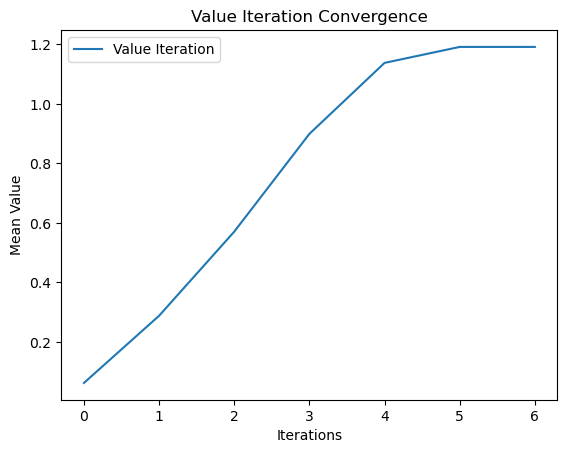

In [15]:
import matplotlib.pyplot as plt
mean_values = [np.mean(v[v != 0]) for v in values_over_iterations]
plt.plot(iterations, mean_values, label="Value Iteration")
plt.xlabel("Iterations")
plt.ylabel("Mean Value")
plt.title("Value Iteration Convergence")
plt.legend()
plt.show()

## End